In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist 
from keras import utils 
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [5]:
kernel_size = (3, 3)

In [18]:
model = Sequential(
    [
        Input(shape=input_shape),
        # Conv2D(16, kernel_size=kernel_size, activation="relu", name="conv2d_1"),
        # Conv2D(32, kernel_size=kernel_size, activation="relu", name="conv2d_2"),
        Conv2D(64, kernel_size=kernel_size, activation="relu", name="conv2d_3"),
        # Conv2D(64, kernel_size=kernel_size, activation="relu", name="conv2d_4"),
        MaxPooling2D(pool_size=(2,2), name="maxpool2d_1"),
        Conv2D(32, kernel_size=kernel_size, activation="relu", name="conv2d_5"),
        Conv2D(32, kernel_size=kernel_size, activation="relu", name="conv2d_6"),
        MaxPooling2D(pool_size=(2,2), name="maxpool2d_2"),
        Flatten(),
        Dense(32, "relu", name="fc1"),
        Dense(16, "relu", name="fc2"),
        # Dense(16, "relu", name="fc3"),
        Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 13, 13, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 4, 4, 32)          0         
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 fc1 (Dense)                 (None, 32)               

In [20]:
batch_size = 128
epochs = 10
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

In [21]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 22s 57ms/step - loss: 0.3971 - accuracy: 0.8771 - val_loss: 0.1237 - val_accuracy: 0.9660
Epoch 2/10
375/375 [==============================] - 19s 50ms/step - loss: 0.1090 - accuracy: 0.9676 - val_loss: 0.1035 - val_accuracy: 0.9693
Epoch 3/10
375/375 [==============================] - 20s 53ms/step - loss: 0.0752 - accuracy: 0.9773 - val_loss: 0.0786 - val_accuracy: 0.9782
Epoch 4/10
375/375 [==============================] - 25s 68ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0920 - val_accuracy: 0.9726
Epoch 5/10
375/375 [==============================] - 25s 67ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0552 - val_accuracy: 0.9828
Epoch 6/10
375/375 [==============================] - 29s 78ms/step - loss: 0.0441 - accuracy: 0.9870 - val_loss: 0.0569 - val_accuracy: 0.9818
Epoch 7/10
375/375 [==============================] - 24s 65ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0522 - val_accuracy:

In [22]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.xticks(list(range(0, len(history.history[metrics[0]]), 2)))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

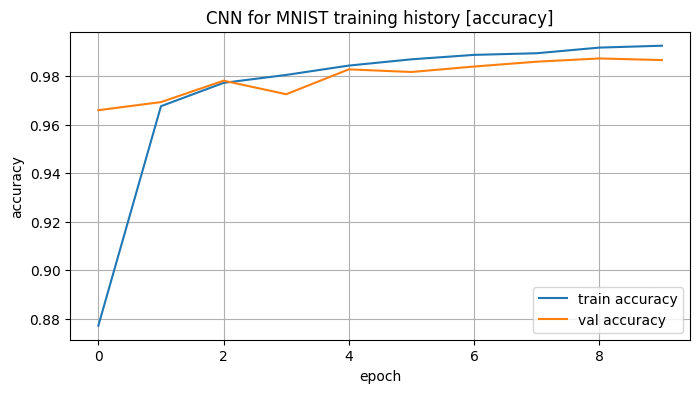

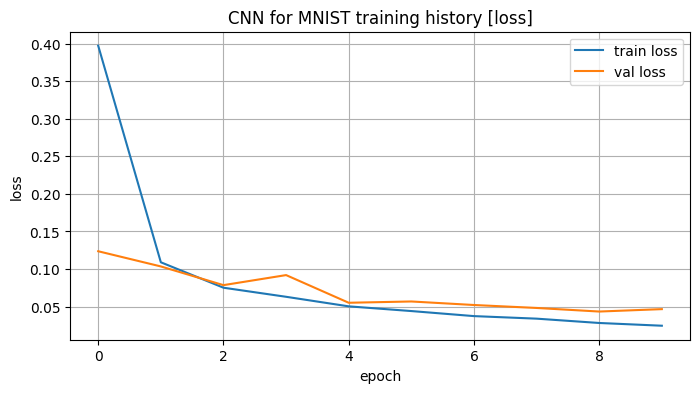

In [24]:
plot_history(history=history, metrics=["accuracy"],model_name="CNN for MNIST")
plot_history(history=history, metrics=["loss"],model_name="CNN for MNIST")